Working on this problem https://www.cs.cmu.edu/~keystroke/
Data comes from 51 subjects typing ".tie5Roanl" 400 times across multiple sessions
We are trying to develop a model which has minimal equal error rate. 
(Diagram https://api.intechopen.com/media/chapter/66135/media/F2.png)
(So first thing I did was look up what that is, what the variables mean etc)
Who else has attempted this problem, how did they appraoch it

In [1]:
# First, imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read in csv file and check what's inside
df = pd.read_csv('DSL-StrongPasswordData.csv')
df.head()

,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,s002,1,1,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,...,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,s002,1,2,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,...,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,s002,1,3,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,...,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,s002,1,4,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,...,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,s002,1,5,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,...,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818


In [3]:
df.info()
# 20,400 rows, 34 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20400 entries, 0 to 20399
Data columns (total 34 columns):
subject            20400 non-null object
sessionIndex       20400 non-null int64
rep                20400 non-null int64
H.period           20400 non-null float64
DD.period.t        20400 non-null float64
UD.period.t        20400 non-null float64
H.t                20400 non-null float64
DD.t.i             20400 non-null float64
UD.t.i             20400 non-null float64
H.i                20400 non-null float64
DD.i.e             20400 non-null float64
UD.i.e             20400 non-null float64
H.e                20400 non-null float64
DD.e.five          20400 non-null float64
UD.e.five          20400 non-null float64
H.five             20400 non-null float64
DD.five.Shift.r    20400 non-null float64
UD.five.Shift.r    20400 non-null float64
H.Shift.r          20400 non-null float64
DD.Shift.r.o       20400 non-null float64
UD.Shift.r.o       20400 non-null float64
H.o           

In [4]:
df.describe()

,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
count,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,...,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000
mean,4.500000,25.500000,0.093379,0.264148,0.170769,0.085727,0.169085,0.083358,0.081565,0.159372,...,0.106259,0.150670,0.044411,0.089899,0.202630,0.112731,0.095589,0.321847,0.226259,0.088306
std,2.291344,14.431223,0.029626,0.220534,0.226836,0.027424,0.123546,0.125755,0.026887,0.226928,...,0.038828,0.107422,0.105197,0.030738,0.150191,0.159571,0.028348,0.225389,0.230759,0.027452
min,1.000000,1.000000,0.001400,0.018700,-0.235800,0.009300,0.001100,-0.162100,0.003200,0.001400,...,0.004000,0.001100,-0.235500,0.003700,0.001300,-0.175800,0.003700,0.008300,-0.124500,0.002900
25%,2.750000,13.000000,0.074400,0.146900,0.049800,0.066000,0.113600,0.027200,0.062000,0.089300,...,0.082100,0.096100,-0.009000,0.067300,0.127600,0.023500,0.077400,0.210000,0.114100,0.069900
50%,4.500000,25.500000,0.089500,0.205950,0.108700,0.081000,0.140400,0.057800,0.077100,0.120900,...,0.101900,0.125000,0.022700,0.085300,0.172500,0.095500,0.093700,0.263000,0.160300,0.085500
75%,6.250000,38.000000,0.107900,0.306450,0.212400,0.099800,0.183900,0.096400,0.096900,0.173100,...,0.122300,0.174600,0.068900,0.107900,0.228800,0.145700,0.111100,0.350200,0.255100,0.103700
max,8.000000,50.000000,0.376100,12.506100,12.451700,0.241100,4.919700,4.799900,0.331200,25.987300,...,2.035300,3.327800,2.524200,0.357700,4.025200,3.978200,0.340700,5.883600,5.836400,0.265100


In [5]:
subjects = df["subject"].unique()
print(subjects) 
# Confirmation there are 51 unique subjects

['s002' 's003' 's004' 's005' 's007' 's008' 's010' 's011' 's012' 's013'
 's015' 's016' 's017' 's018' 's019' 's020' 's021' 's022' 's024' 's025'
 's026' 's027' 's028' 's029' 's030' 's031' 's032' 's033' 's034' 's035'
 's036' 's037' 's038' 's039' 's040' 's041' 's042' 's043' 's044' 's046'
 's047' 's048' 's049' 's050' 's051' 's052' 's053' 's054' 's055' 's056'
 's057']


In [6]:
sessions = df["sessionIndex"].unique()
print(sessions)
# 400 times across 8 sessions means each subject typed the string ~ 50 times per session

[1 2 3 4 5 6 7 8]


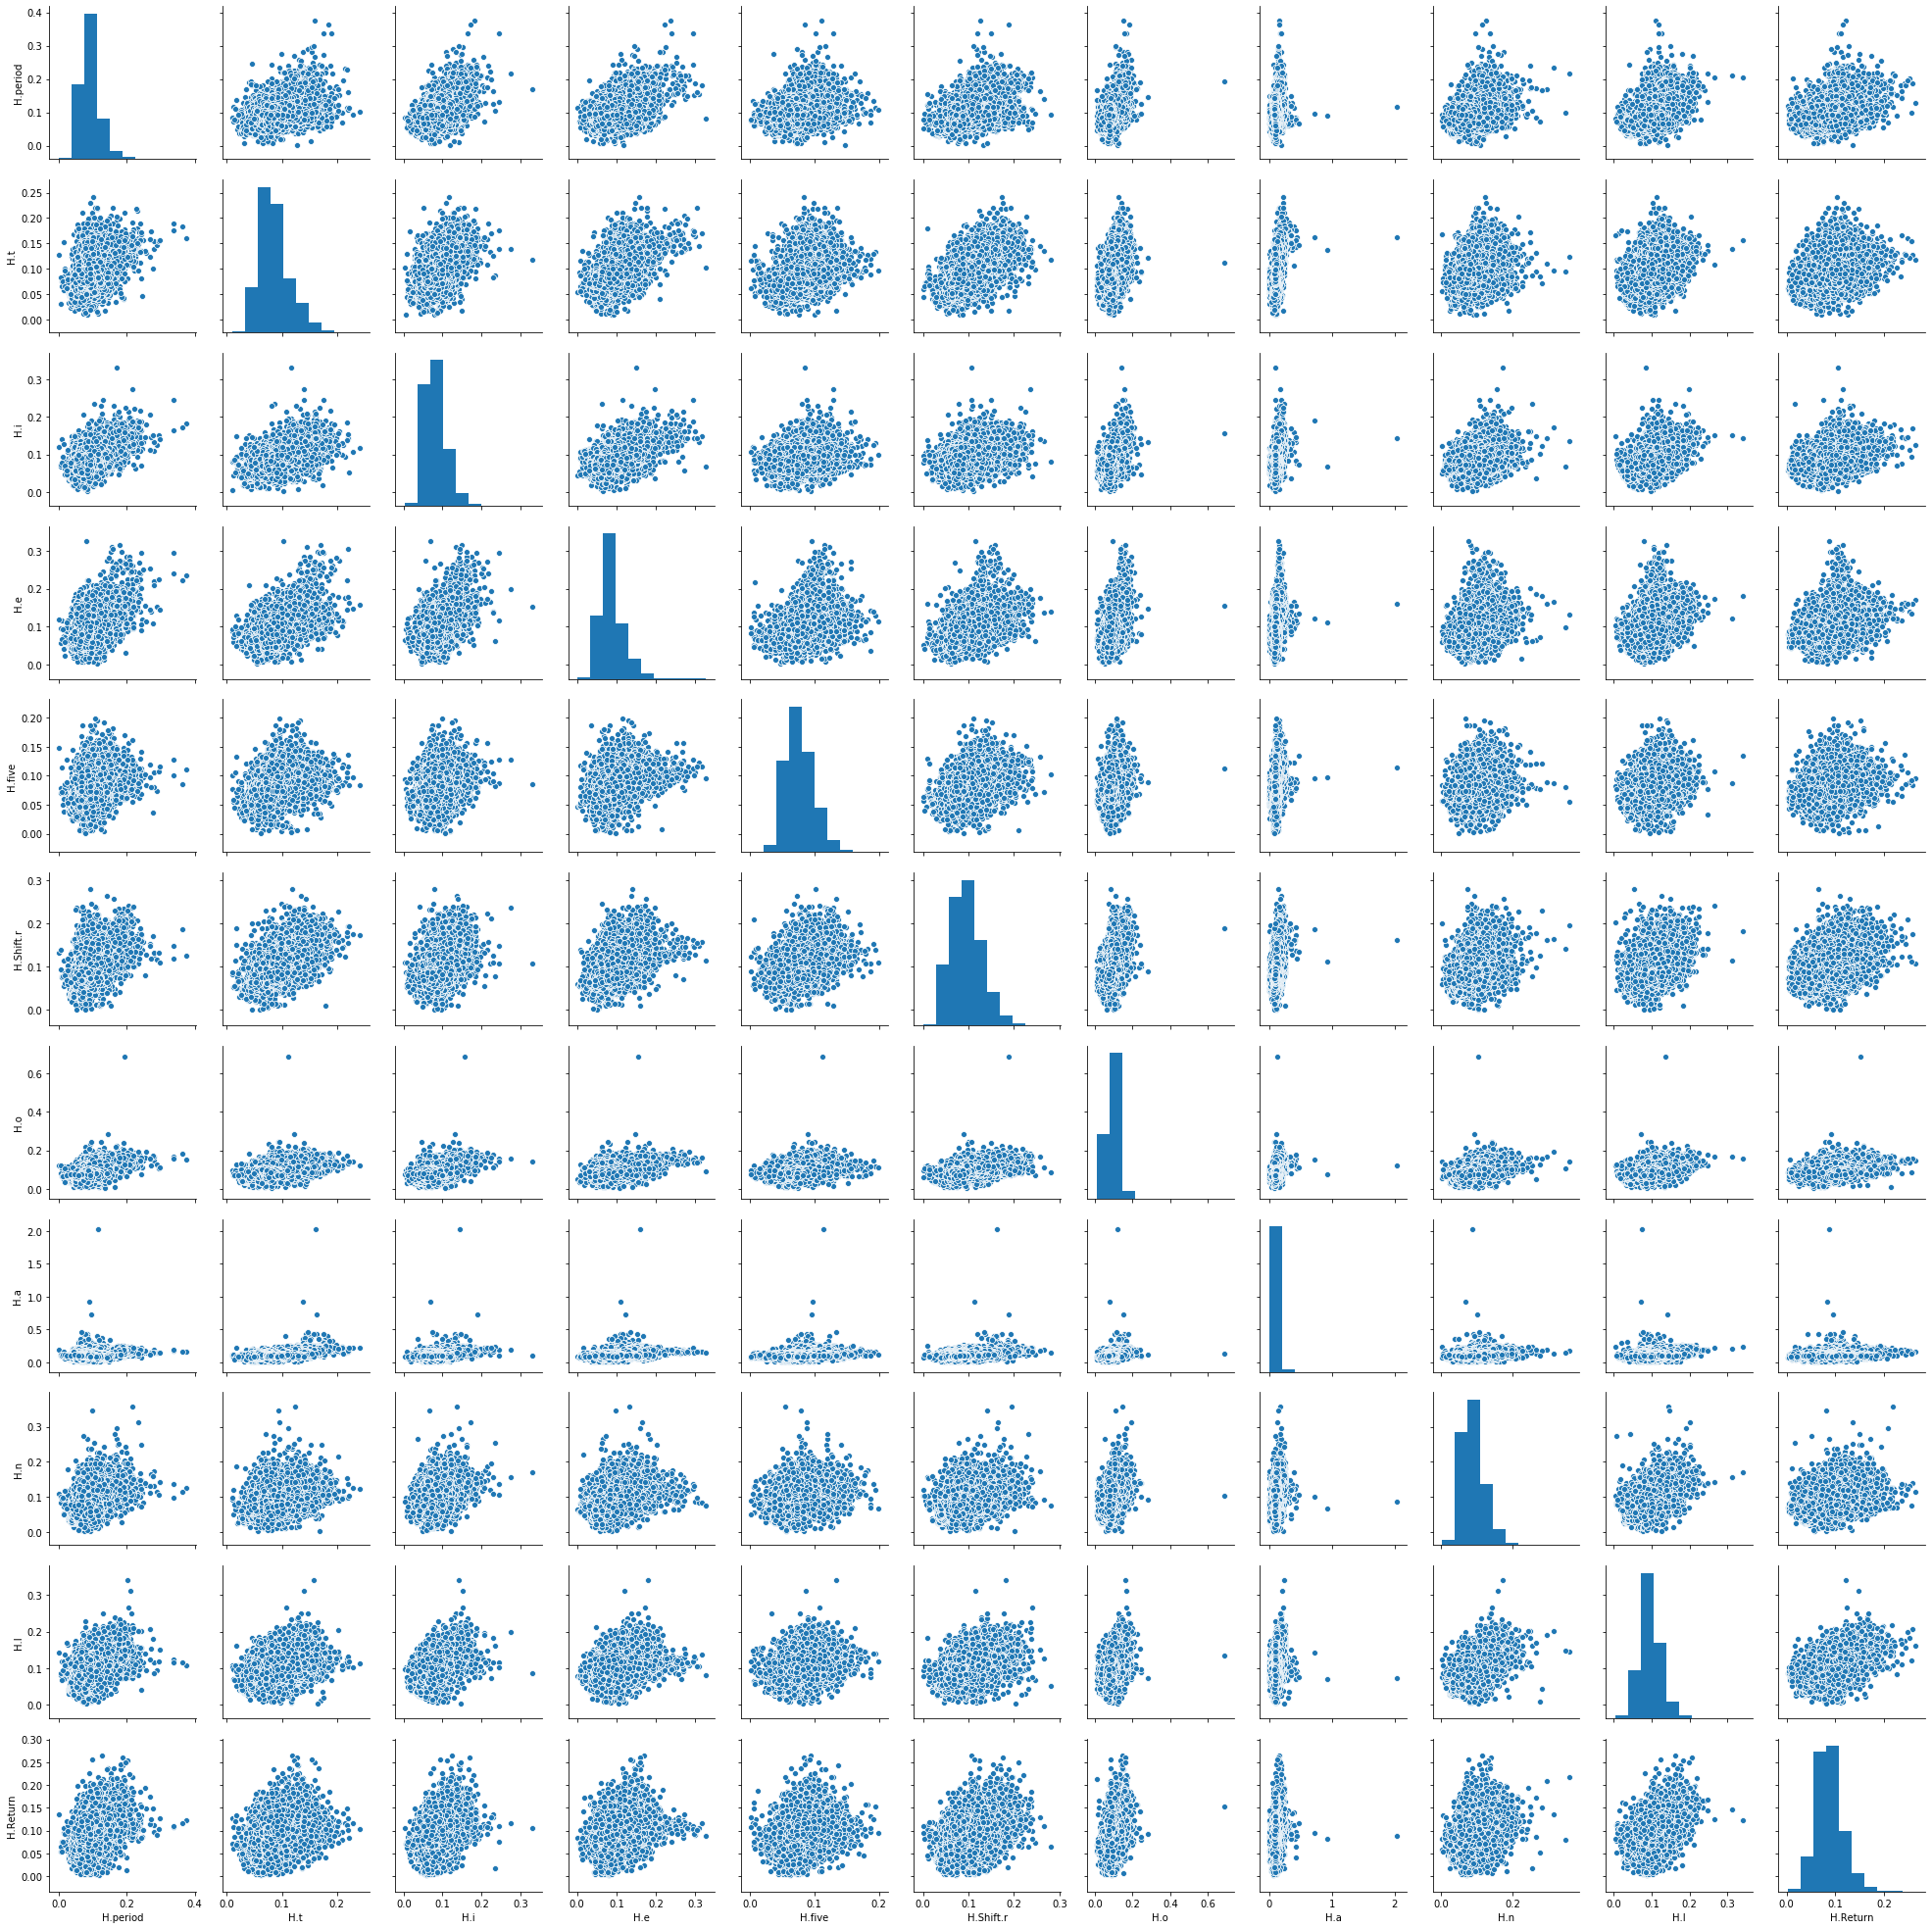

In [7]:
sns.pairplot(df.filter(['H.period','H.t','H.i','H.e','H.five','H.Shift.r','H.o','H.a','H.n','H.l','H.Return'],axis=1))

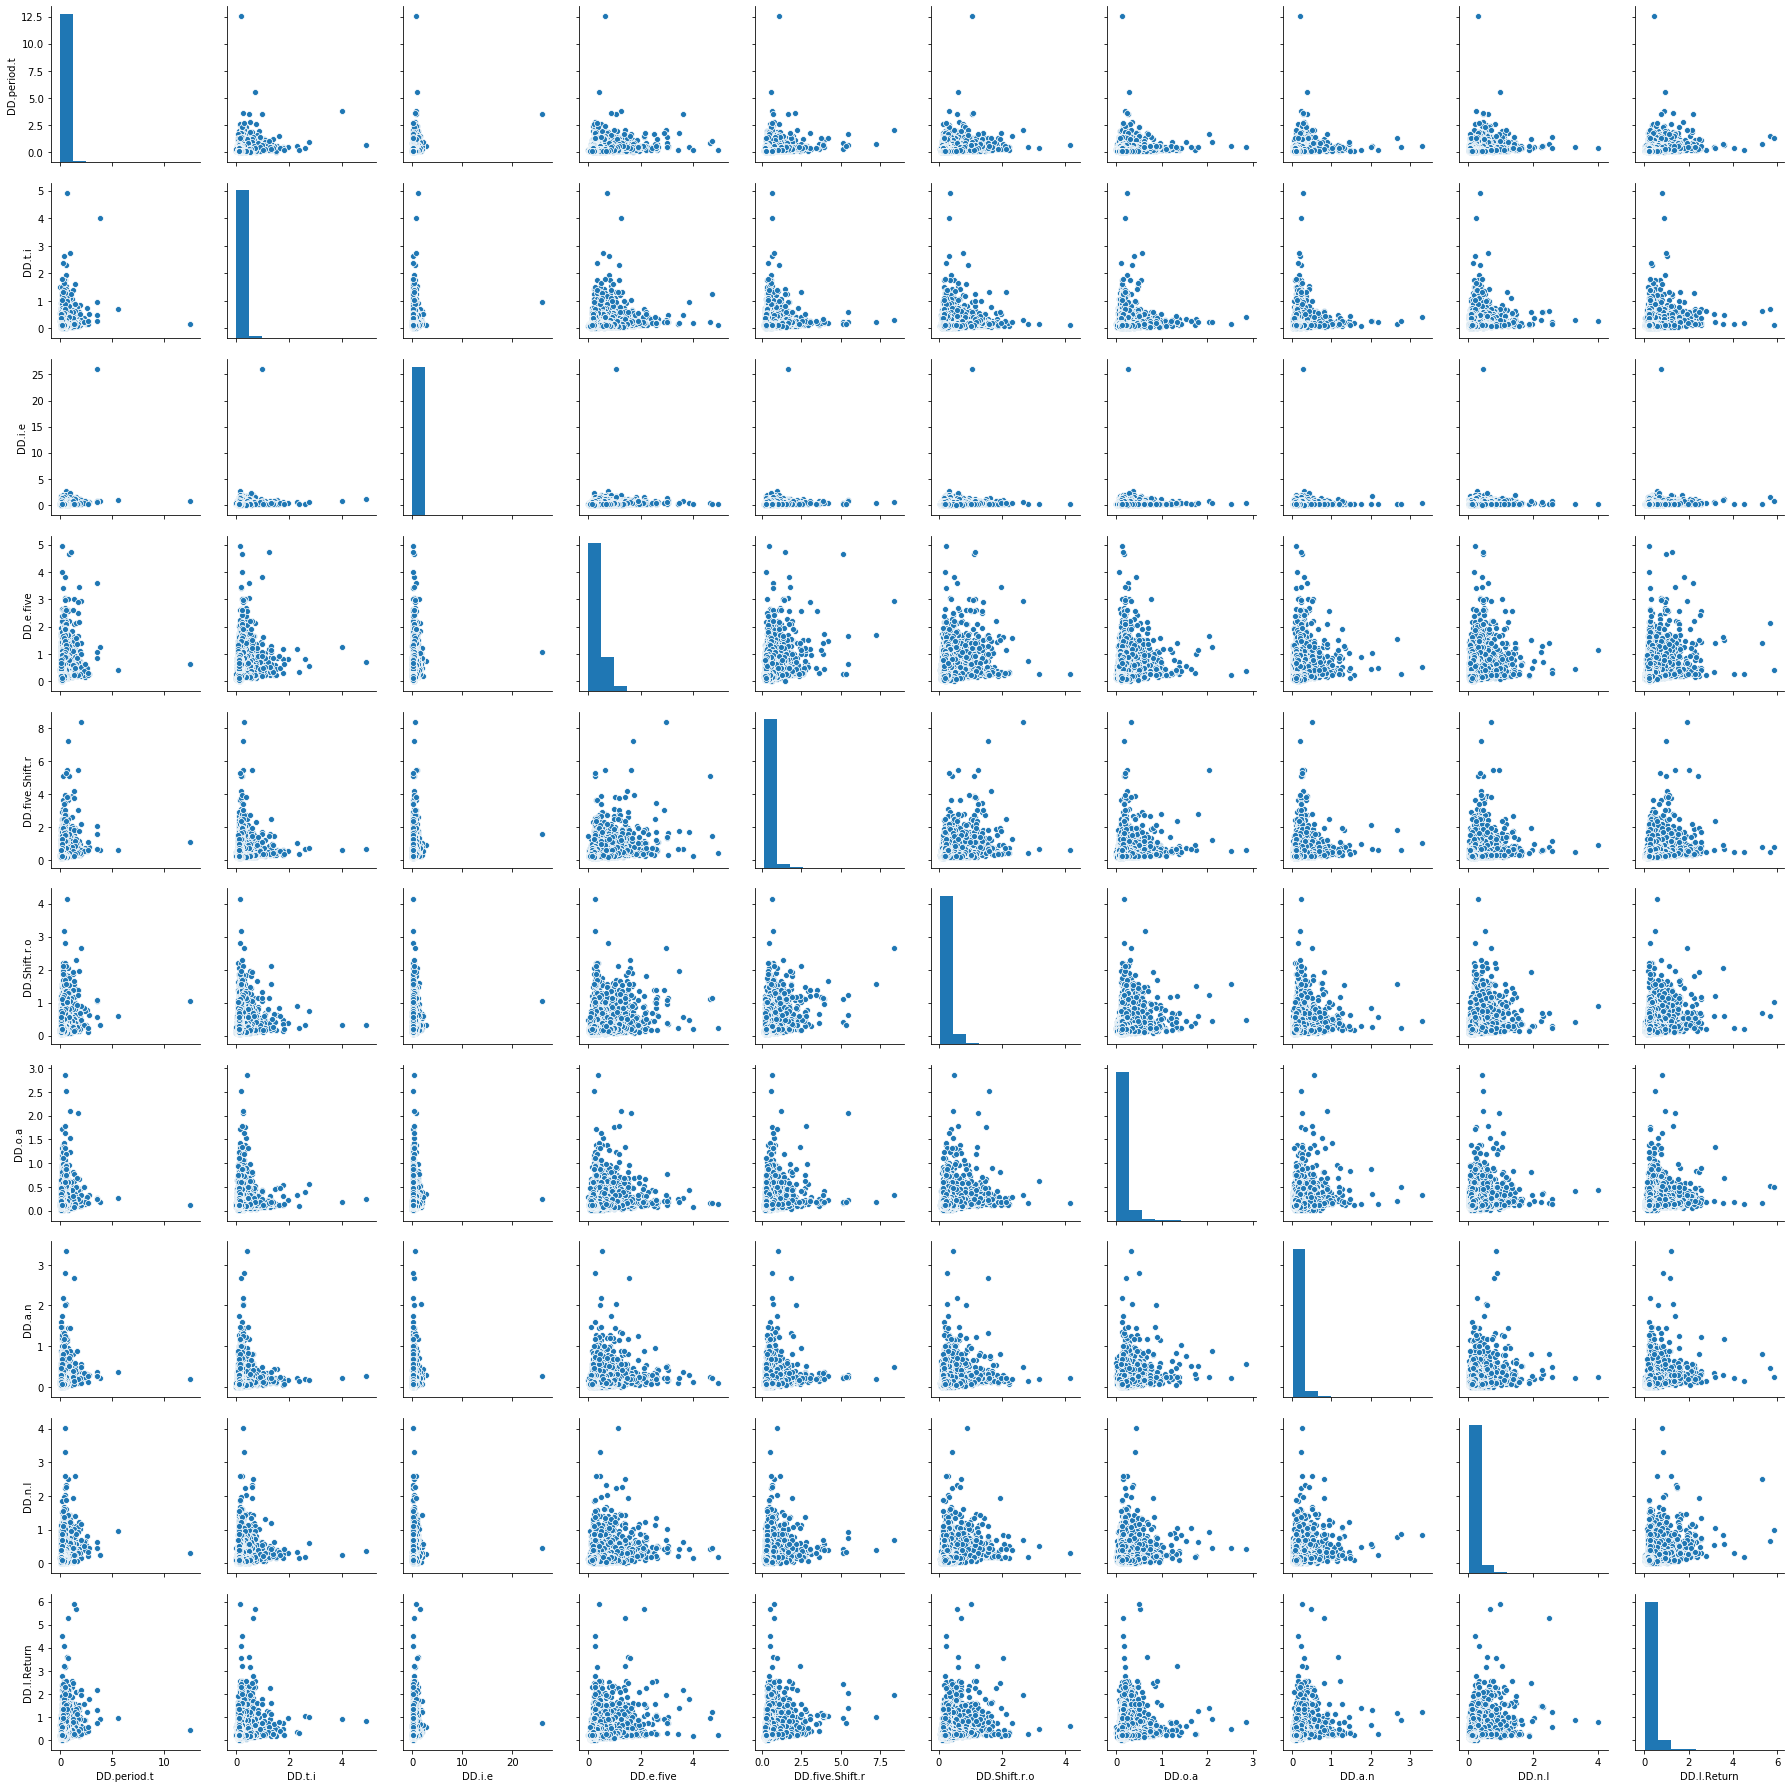

In [8]:
sns.pairplot(df.filter(['DD.period.t','DD.t.i','DD.i.e','DD.e.five','DD.five.Shift.r','DD.Shift.r.o','DD.o.a','DD.a.n','DD.n.l','DD.l.Return'],axis=1))

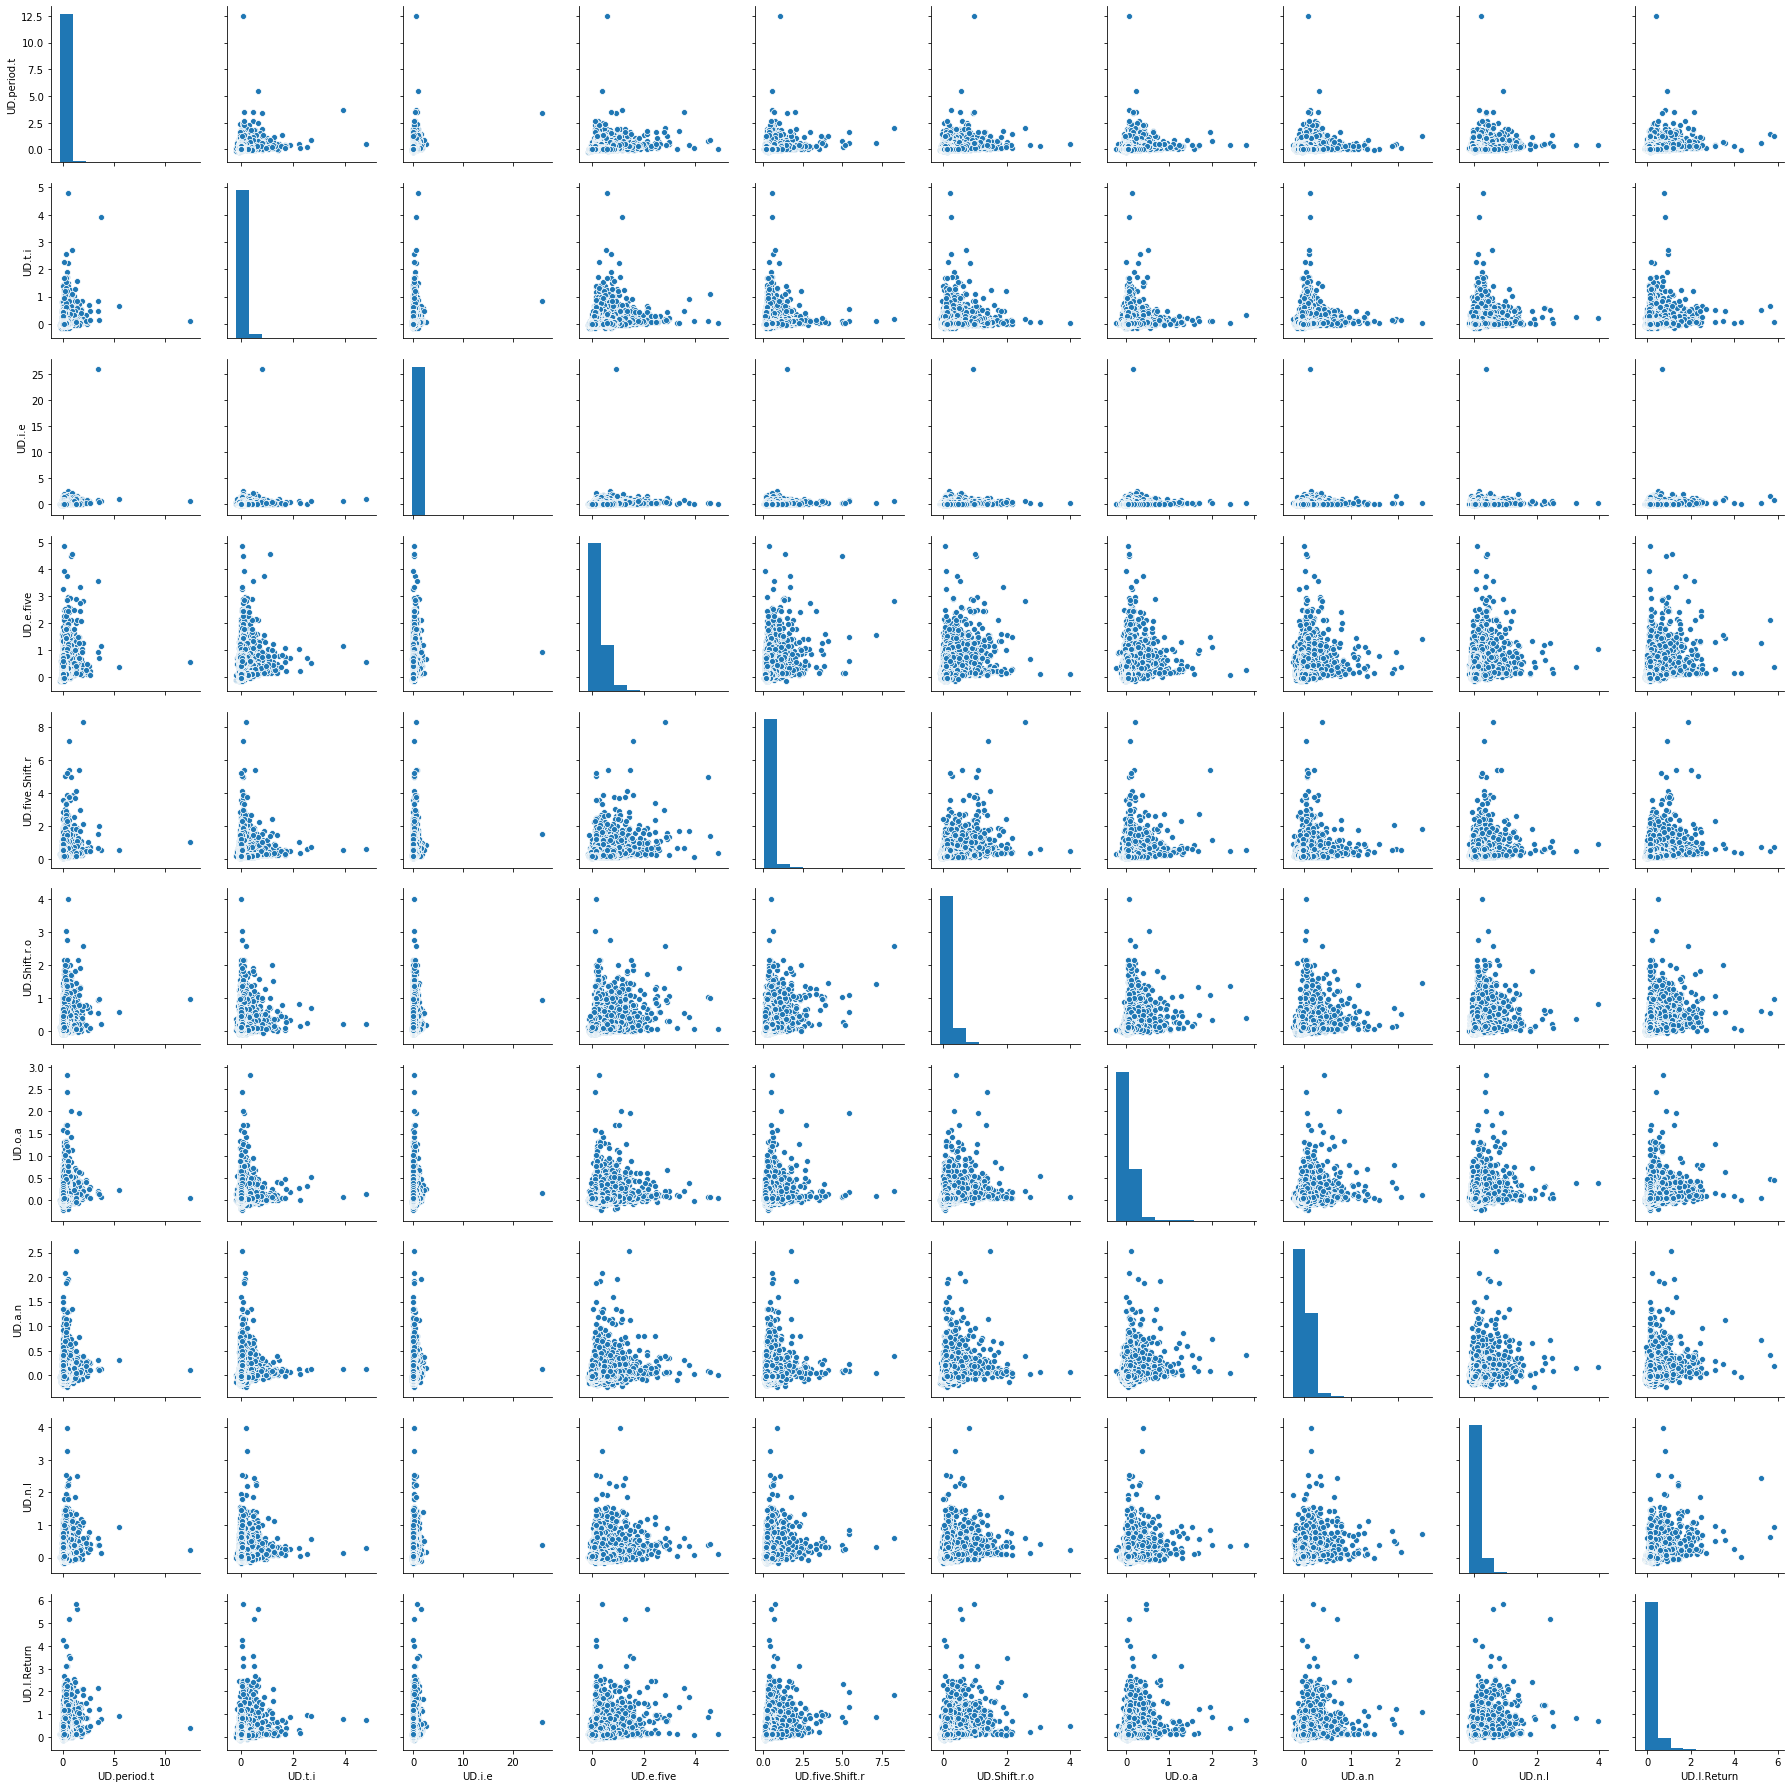

In [9]:
sns.pairplot(df.filter(['UD.period.t','UD.t.i','UD.i.e','UD.e.five','UD.five.Shift.r','UD.Shift.r.o','UD.o.a','UD.a.n','UD.n.l','UD.l.Return'],axis=1))